In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
plt.rcParams['figure.figsize']  = (18, 10)
plt.ion()
plt.style.use('seaborn-colorblind')

# Generating Data !

In [3]:
x_outliers = np.linspace(0,1,30)
y_outliers = np.random.rand(30)

In [4]:
x_data = np.linspace(0,1,50)
y_data = x_data*0.8 + np.random.rand(50)*0.1

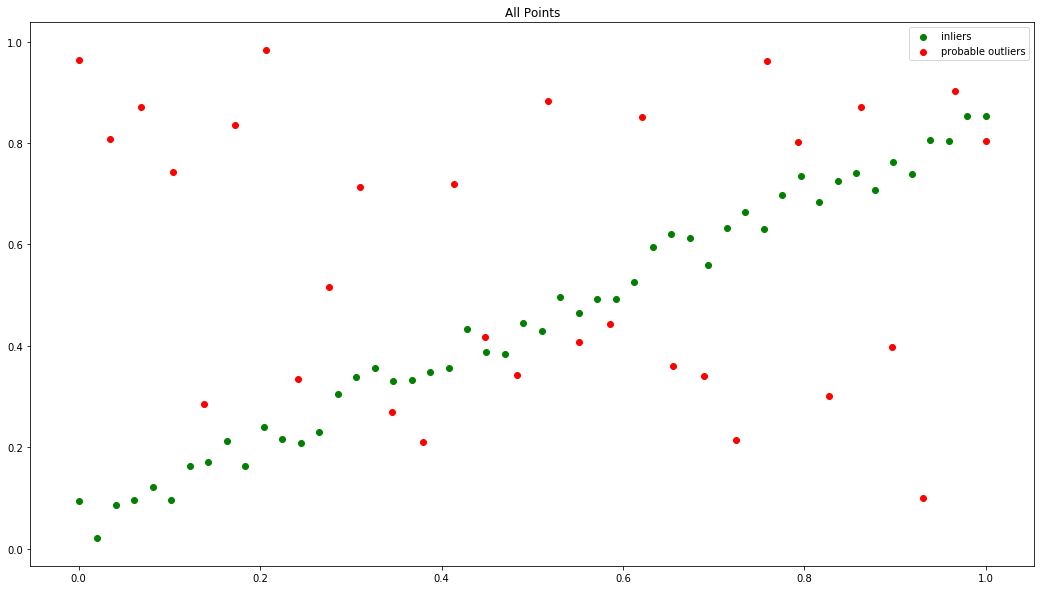

In [5]:
all_x = np.concatenate((x_data, x_outliers))
all_y = np.concatenate((y_data, y_outliers))

plt.scatter(x_data, y_data, label="inliers", color='g')
plt.scatter(x_outliers, y_outliers, label="probable outliers", color='r')
plt.legend()
plt.title("All Points")

plt.show()

## RANSAC Algorithm

1: Select randomly the minimum number of points required to determine the model
parameters.

2: Solve for the parameters of the model.

3: Determine how many points from the set of all points fit with a predefined tolerance.

4: If the fraction of the number of inliers over the total number points in the set
exceeds a predefined threshold τ , re-estimate the model parameters using all the
identified inliers and terminate.

5: Otherwise, repeat steps 1 through 4 (maximum of N times).

### Point to line distance

$\operatorname{distance}(ax+by+c=0, (x_0, y_0)) = \frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}. $



In [6]:
def dist(a,b,x, y):
    return np.absolute((a * x) - y + b ) / np.sqrt(np.power(a,2) + 1)

def RANSAC(x, y, m=0.1, n=0.6, tolerance=0.05, max_iters = 50):
    points_count = len(x)
    _m = int(points_count * m) #points to define the model in each iteration
    _n = int(points_count * n) #threshold for stoping the algorithm
    
    idx=np.arange(points_count)
    
    best_model = [[],[]] #x,y

    selected_points_x = []
    
    iteration = 0
    
    while(iteration < max_iters) and (len(selected_points_x) < _n):
        selected_points_x = []
        selected_points_y = []
        not_selected_points_x = []
        not_selected_points_y = []
        
        # choose _m random points
        random.shuffle(idx)
        
        rand_x = np.array([x[i] for i in idx[0:_m]])
        rand_y = np.array([y[i] for i in idx[0:_m]])
        
        #fit model
        a,b = np.linalg.lstsq(np.vstack([rand_x, np.ones(len(rand_x))]).T, rand_y)[0]
        
        #verify the distance from eacch point to the fitted model
        for i in range(points_count):
            distance = dist(a, b, x[i], y[i])
            if distance < tolerance:
                selected_points_x.append(x[i])
                selected_points_y.append(y[i])
            else: 
                not_selected_points_x.append(x[i])
                not_selected_points_y.append(y[i])
                
        if len(selected_points_x) > len(best_model[0]):
            best_model = [selected_points_x, selected_points_y]
        
        iteration += 1
        
    #Use the best selection to fit the model
    selected_points_x = best_model[0]
    selected_points_y = best_model[1]
    
    a,b = np.linalg.lstsq(np.vstack([selected_points_x, np.ones(len(selected_points_x))]).T, selected_points_y)[0]
    
    model=[a,b]

    #plot it all :)
    plt.figure()
    plt.scatter(x, y, color="r")
    plt.scatter(selected_points_x, selected_points_y, color="g")
    plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*a + b - tolerance, "--", label="- Tolerance", color="b")
    plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*a + b + tolerance, "--", label="+ Tolerance", color="b")
    plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*a + b, label="Fitted Model", color="b")
    plt.legend()
    plt.title("Iter {}".format(iteration))
    plt.plot() 
    
    return model, selected_points_x, selected_points_y
    
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:51: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


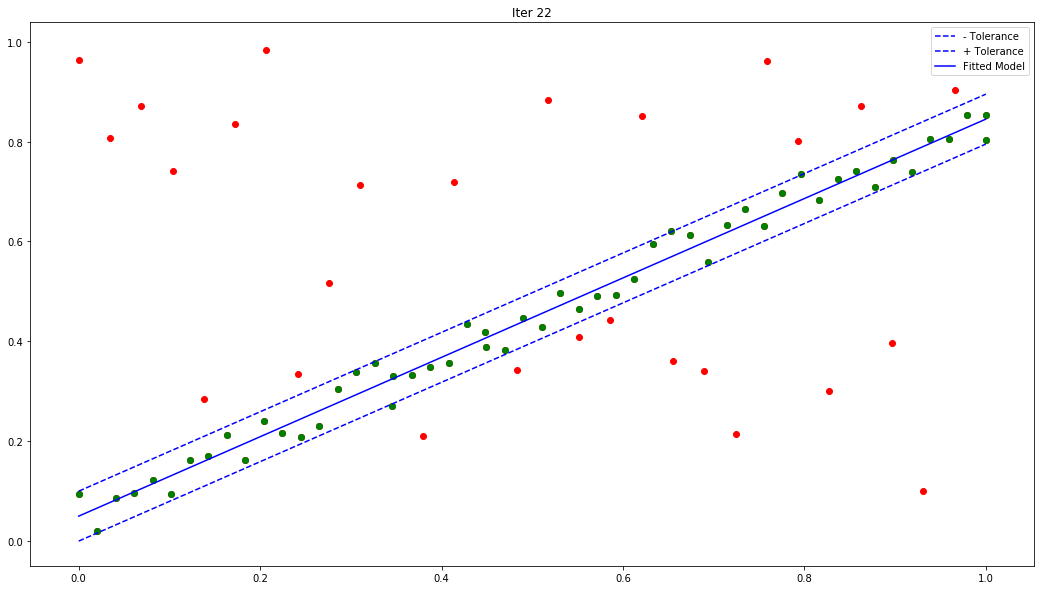

In [7]:
model, inliers_x, inliers_y = RANSAC(all_x, all_y, m=0.1, n=0.6, tolerance=0.05, max_iters = 50)

